Tokenizing texts: 100%|██████████| 43437/43437 [03:43<00:00, 194.68it/s]


       token_length
count  43437.000000
mean     706.799342
std      452.973931
min        7.000000
25%      396.000000
50%      629.000000
75%      888.000000
max     6466.000000
                                                    text  token_length
0      rome s02 toppen innen tv-drama akkurat nå! den...           622
1      twin peaks - definitive gold box edition gull ...           689
2      the wire (sesong 1-4) the wire vil gjøre deg a...           901
3      mad men (sesong 1) stilig, underholdende og so...           774
4      mad men (sesong 2) tv-underholdning av høyeste...           598
...                                                  ...           ...
43432  politisk protestpønk fra gamle helter gamle he...           311
43433  79-åringen står fortsatt på barrikadene ben ha...           891
43434  utseendet teller ikke - eller? «ansiktet» utfo...           733
43435  hektisk homsesex med tårefylte forviklingar bo...           860
43436  krigen i norge, med tyske øyne s

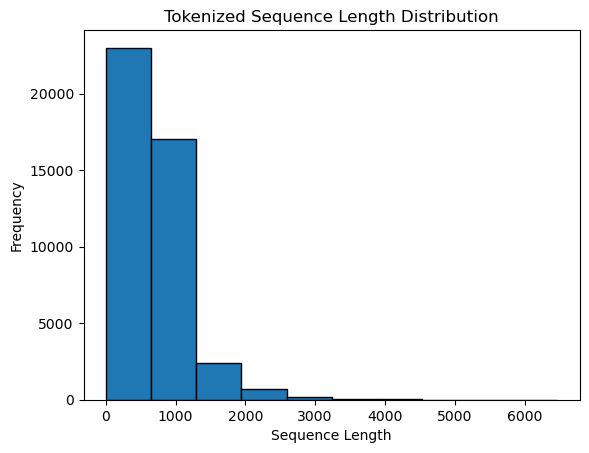

In [1]:
from transformers import AutoTokenizer
import pandas as pd
from tqdm import tqdm
from pathlib import Path
import os
import re
import matplotlib.pyplot as plt

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained('NbAiLab/nb-bert-base')

# Base directory and dataset paths
base_dir = Path(os.getcwd()).parent
train_dir = base_dir / 'data' / 'train'
dev_dir = base_dir / 'data' / 'dev'
test_dir = base_dir / 'data' / 'test'

# Preprocessing function
def preprocessing(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\s([?.!"](?:\s|$))', r'\1', text)  # Fix punctuation spacing
    text = text.strip()
    return text

# Read all texts from train, dev, and test directories
all_texts = []

for folder in [train_dir, dev_dir, test_dir]:
    for file in folder.iterdir():
        with open(file, 'r', encoding='utf-8') as f:
            all_texts.append(f.read())

# Preprocess all texts
all_texts = [preprocessing(text) for text in all_texts]

# Tokenize all texts with tqdm
tokenized_lengths = []
for text in tqdm(all_texts, desc="Tokenizing texts"):
    length = len(tokenizer.encode(text, add_special_tokens=True))
    tokenized_lengths.append(length)

# Create a DataFrame with tokenized lengths
df = pd.DataFrame({"text": all_texts, "token_length": tokenized_lengths})

# Print statistics
print(df.describe())  # Provides mean, std, min, max, etc.
print(df)

# Plot histogram of token lengths
plt.hist(df["token_length"], bins=10, edgecolor="black")
plt.title("Tokenized Sequence Length Distribution")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()


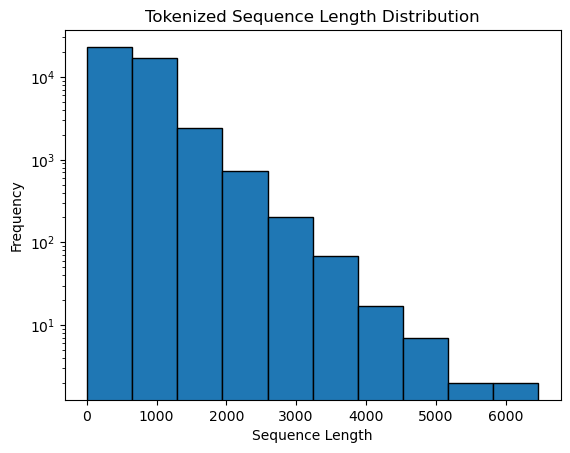

In [2]:
# show log scale

plt.hist(df["token_length"], bins=10, edgecolor="black")
plt.yscale('log')
plt.title("Tokenized Sequence Length Distribution")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()